# Titanic: Machine Learning from Disaster

## Notebook by Michael Kalmus with Inspiration from https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

## Final Kaggle Accuracy - 78.229%


# 0. Outline of Notebook
1. Exploratory Data Analysis (EDA)\
    1.1. Numerical Summaries of Training Data\
    1.2. Visual Summaries of Training Data

2. Data Pre-processing\
    2.1. Write Function to Clean Data and Process Training and Testing Sets\
    2.2. Divide Data into Training and Testing
        2.2.1. Without Stratification
        2.2.2. With Stratification on 'Sex'
    2.3. Explore/validate training and testing split

3. Model Fitting\
    3.1. Fit Many Initial Models\
    3.2. Decision Tree Model and Tuning\
    3.3. Random Forest Model and Tuning\
    3.4. Ada-boosted Model and Tuning
    
4. More Data Pre-processing/Feature Engineering

5. More Model Fitting -- Ada-boosted Model with Different Input Data

6. Voting Classifier Ensemble Model

7. Predictions and writing output to csv for Kaggle

8. Final Discussion

## Introduction

In this notebook, I use machine learning and fit multiple models to the titanic data to predict who survived. I pre-process the data multiple ways and fit multiple models to achieve my final results. The final model was a voting classifier ensemble model which took in inputs from a fitted random forest, a fitted decision tree, and an ada-boosted model.

# 1. Exploratory Data Analysis (EDA)

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
np.random.seed(42)

In [66]:
train = pd.read_csv('train.csv')
train_data = train.set_index('PassengerId')
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [67]:
test = pd.read_csv('test.csv')
test_ids = test["PassengerId"]
test_data = test.set_index('PassengerId')
test_data.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## 1.1 Numerical Summaries of Training Data

In [68]:
print(f"There are {len(train_data)} rows in the provided training data")
print(f"There are {len(train_data)} rows in the provided testing data")

There are 891 rows in the provided training data
There are 891 rows in the provided testing data


In [69]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [71]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [72]:
pct_cabin_na = round(train_data['Cabin'].isnull().sum() / len(train_data['Cabin'])*100, 2)
print(f"{pct_cabin_na}% of cabin values are null in the trainind data")
pct_cabin_na_test = round(test_data['Cabin'].isnull().sum() / len(test_data['Cabin'])*100, 2)
print(f"{pct_cabin_na_test}% of cabin values are null in the trainind data")

77.1% of cabin values are null in the trainind data
78.23% of cabin values are null in the trainind data


### 1.1.1 Numerical Summary Discussion
From the above, we see that in the training data, we have null values in age (numerical), cabin (categorical), and embarked (categorical). In the test set, we have null values in age, fare (numerical), and cabin. 

Comparing the two, the training set has null values in embarked where the test set does not; and the test set has null values in fare where the train set does not. Both sets of data have null values for age and cabin.

In both dataframes, we can see that a majority of cabin values are null.

## 1.2 Visual Summaries of Training Data

In [73]:
import matplotlib.pyplot as plt

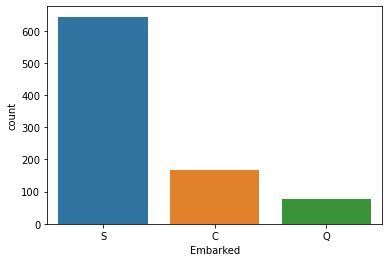

In [74]:
sns.countplot(x="Embarked", data=train_data)
plt.show()

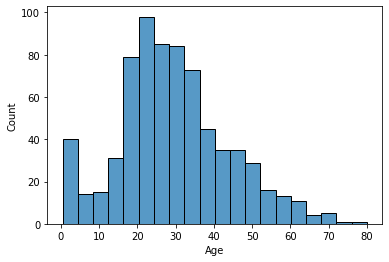

In [75]:
sns.histplot(x=train_data['Age'])
plt.show()

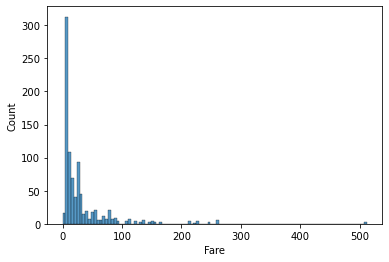

In [76]:
sns.histplot(x=train_data['Fare'])
plt.show()

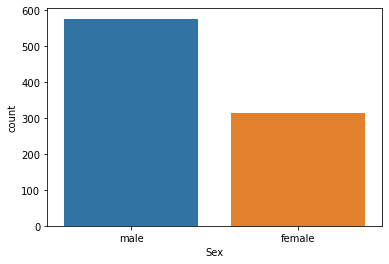

In [77]:
sns.countplot(x="Sex", data=train_data)
plt.show()

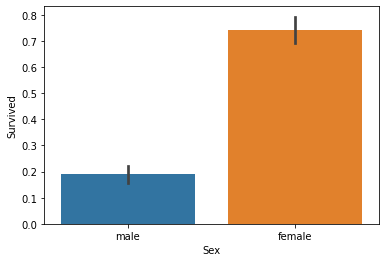

In [78]:
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.show()

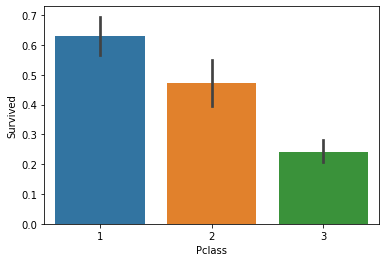

In [79]:
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.show()

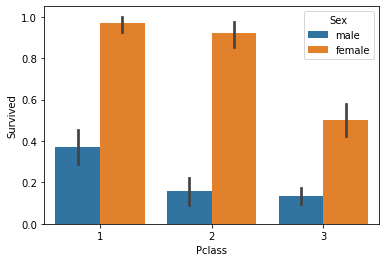

In [80]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data)
plt.show()

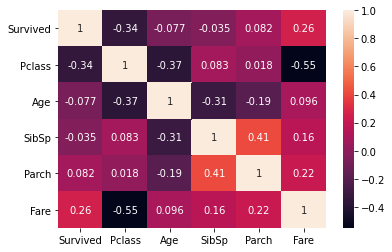

In [81]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

### 1.2.1 Visual Summary Discussion

From the first barplot, we can see that far more people embarked from Southampton than any other location. This is important because I will likely fill with this value for the NA values. Age also seems slightly skewed so it may be best to scale the data or take a log.We can see that despite more men being on board, far more women survived. 

When we look into which people survived by economic class (Pclass in the data), more people survived in the upper class than in the middle class, and more people survived in the middle class than the lower class. If we further stratify by gender, we can see this trend holds true for both males and females, and we can see again that more females survived than males for each class.

Lastly, I plotted correlation of the attributes. From the heatmap, we can see that it appears no attribute is significantly correlated with survival (i.e. the first row in the heatmap), and no attributes appear significantly correlated with any other attribute.

Given that name and ticket are identifiers to people and likely do not contain much information about survival, I dropped the name and ticket columns. It is notable that perhaps name can be made into a predictor by taking each person's prefix, and I discuss this more at the end.

Overall, as we can see from the numerical and visual summaries, some pre-processing definitely needs to be done on the data. For example, we can fill age and fare with their median because they are NA and fill Embarked NA values with the mode.

# 2. Data Pre-Processing based on EDA

## 2.1 Write Function to Clean Data and Process Training and Testing Sets
From EDA, we saw that 'Embarked', 'Age', and 'Fare' had a few NA values and that a majority of cabin values were NA. As such, I wrote a function that first fills NA values (for embarked, fill with S; for age and fare, fill with median). Then, it replaces male and female with their binary counterparts (male is 0 and female is 1), and replaces 'Embarked' Categories with ordinal values (C = 0, S = 1, Q = 2). Lastly, as per the EDA, we drop cabin because it is mostly NA, then name and ticket because they likely will not help predict survival.

In [82]:
def clean_data(df):
    df['Embarked'] = df['Embarked'].fillna("S") 
    df['Embarked'] = df['Embarked'].replace(['C', 'S', 'Q'], [0, 1, 2])

    df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])

    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)
    
    return df

In [83]:
train_data_prepped = clean_data(train_data.copy())
test_data_prepped = clean_data(test_data.copy())

## 2.2 Divide Data into Training and Testing
In this section, I divide the given training data into a training and testing set using an 80/20 split. The purpose of this is to build the model on the training set and test it on the testing set to minimize potential overfitting or underfitting. Furthermore, I later use partitioned data to tune the model and create a final model.

In addition to splitting the data, we create features (X) and labels (y) matrices for the training and testing sets to be used later.

### 2.2.1 Without Stratification

In [84]:
from sklearn.model_selection import train_test_split

X = train_data_prepped.drop(['Survived'], axis=1)
y = train_data_prepped[['Survived']]

train_data_X, test_data_X, train_data_y, test_data_y = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(train_data_prepped, train_data_prepped[['Sex']]):
    titanic_train_set = train_data_prepped.loc[train_data_prepped.index.intersection(train_index)]
    titanic_test_set = train_data_prepped.loc[train_data_prepped.index.intersection(test_index)]

In [86]:
train_X_strat = titanic_train_set.drop('Survived',axis=1)
train_y_strat = titanic_train_set['Survived'].copy()
test_X_strat = titanic_test_set.drop('Survived',axis=1)
test_y_strat = titanic_test_set[['Survived']].copy()

## 2.3 Ensure split data has no null values and distribution of sex and embark location aligns with the original data.

In [87]:
train_data_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
print('Distribution of Sex (Unstratified):')
print("")
print('Raw Data:')
print(train_data['Sex'].value_counts() / len(train_data['Sex']))
print("")
print('Created Training Set:')
print(train_data_X['Sex'].value_counts() / len(train_data_X['Sex']))
print("")
print('Created Testing Set:')
print(test_data_X['Sex'].value_counts() / len(test_data_X['Sex']))

Distribution of Sex (Unstratified):

Raw Data:
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Created Training Set:
0    0.655899
1    0.344101
Name: Sex, dtype: float64

Created Testing Set:
0    0.614525
1    0.385475
Name: Sex, dtype: float64


In [89]:
print('Distribution of Sex (Stratified):')
print("")
print('Raw Data:')
print(train_data['Sex'].value_counts() / len(train_data['Sex']))
print("")
print('Created Training Set:')
print(train_X_strat['Sex'].value_counts() / len(train_X_strat['Sex']))
print("")
print('Created Testing Set:')
print(test_X_strat['Sex'].value_counts() / len(test_X_strat['Sex']))

Distribution of Sex (Stratified):

Raw Data:
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Created Training Set:
0    0.648383
1    0.351617
Name: Sex, dtype: float64

Created Testing Set:
0    0.642458
1    0.357542
Name: Sex, dtype: float64


In [90]:
print('Distribution of Embarked (Unstratified):')
print("")
print('Raw Data:')
print(train_data['Embarked'].value_counts() / len(train_data['Embarked']))
print("")
print('Created Training Set:')
print(train_data_X['Embarked'].value_counts() / len(train_data_X['Embarked']))
print("")
print('Created Testing Set:')
print(test_data_X['Embarked'].value_counts() / len(test_data_X['Embarked']))

Distribution of Embarked (Unstratified):

Raw Data:
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

Created Training Set:
1    0.740169
0    0.175562
2    0.084270
Name: Embarked, dtype: float64

Created Testing Set:
1    0.664804
0    0.240223
2    0.094972
Name: Embarked, dtype: float64


In [91]:
print('Distribution of Sex (Stratified):')
print("")
print('Raw Data:')
print(train_data['Embarked'].value_counts() / len(train_data['Embarked']))
print("")
print('Created Training Set:')
print(train_X_strat['Embarked'].value_counts() / len(train_X_strat['Embarked']))
print("")
print('Created Testing Set:')
print(test_X_strat['Embarked'].value_counts() / len(test_X_strat['Embarked']))

Distribution of Sex (Stratified):

Raw Data:
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

Created Training Set:
1    0.731364
0    0.181435
2    0.087201
Name: Embarked, dtype: float64

Created Testing Set:
1    0.703911
0    0.217877
2    0.078212
Name: Embarked, dtype: float64


From the outputs, we can see stratifying the data by sex produces training and testing data with distributions that much better matches the output.

## 3 Model Fitting
In this section, I fit 8 different models and examine the accuracy of each. To do this, I fit each model on the created training data, used the fitted model to predict outcomes for the testing data, and compared predicted outcomes to known outcomes.

Then, I choose one model to further tune/boost and create a final prediction model.

## 3.1 Fit Multiple Models

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [93]:
# from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42),
    GaussianNB(),
    ]

In [94]:
X_train = train_X_strat
y_train = train_y_strat

X_test = test_X_strat
y_test = test_y_strat

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 72.63%
Linear SVM Accuracy: 83.24%
RBF SVM Accuracy: 63.13%
Decision Tree Accuracy: 83.24%
Random Forest Accuracy: 83.80%
Neural Net Accuracy: 81.56%
AdaBoost Accuracy: 83.80%
Naive Bayes Accuracy: 83.24%


## 3.2 Tuning/Boosting Decision Tree Model

In [95]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_fitted = dt_model.fit(train_X_strat, train_y_strat)

scores_train = cross_val_score(
    dt_model_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [96]:
print('BASIC DECISION TREE RESULTS')
print('-'*50)
print("Model Score (Testing):", dt_model_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_train.mean()*100, scores_train.std() * 2*100))

BASIC DECISION TREE RESULTS
--------------------------------------------------
Model Score (Testing): 0.8435754189944135
Accuracy (fitting training data): 80.59% (+/- 5.89)


In [97]:
param_grid = {
    'random_state': [42],
    'max_features': [1, 2, 3, 4, 5, 'auto'],
    'max_depth': [2, 4, 5, 7, 9, None],
    'criterion': ['gini', 'entropy']
             }

In [98]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(dt_model_fitted, param_grid, cv=10, n_jobs=-1)
grid_results = grid_clf.fit(train_X_strat,train_y_strat)
grid_results.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42)

In [99]:
dt_tuned = grid_results.best_estimator_
dt_tuned_fitted = dt_tuned.fit(train_X_strat, train_y_strat)

scores_train = cross_val_score(
    dt_tuned_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [100]:
print('TUNED DECISION TREE RESULTS')
print('-'*50)
print("Model Score (Testing):", dt_tuned_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_train.mean()*100, scores_train.std() * 2*100))

TUNED DECISION TREE RESULTS
--------------------------------------------------
Model Score (Testing): 0.8324022346368715
Accuracy (fitting training data): 81.48% (+/- 4.82)


## 3.3 Tuning/Boosting Random Forest Model

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [102]:
rf_model = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10, 
    max_features=1, 
    random_state=42)

In [103]:
rf_model_fitted = rf_model.fit(train_X_strat, train_y_strat)

In [104]:
scores_train = cross_val_score(
    rf_model_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [105]:
print('BASIC RANDOM FOREST RESULTS')
print('-'*50)
print("Model Score (Testing):", rf_model_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_train.mean()*100, scores_train.std() * 2*100))

BASIC RANDOM FOREST RESULTS
--------------------------------------------------
Model Score (Testing): 0.8379888268156425
Accuracy (fitting training data): 82.49% (+/- 5.94)


In [106]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120],
                 'random_state': [42],
                 'max_features': [1, 2, 3, 4, 5, 'auto'],
                 'max_depth': [2, 5, 7, 9, None],
                 'criterion': ['gini', 'entropy']
             }

from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_results = grid_clf.fit(train_X_strat,train_y_strat)

grid_results.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=4,
                       n_estimators=20, random_state=42)

In [107]:
rf_model_best = grid_results.best_estimator_
rf_best_fitted = rf_model_best.fit(train_X_strat, train_y_strat)

scores_tuned_rf = cross_val_score(
    rf_best_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [108]:
print('TUNED RANDOM FOREST RESULTS')
print('-'*50)
print("Model Score: ", rf_best_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_tuned_rf.mean()*100, scores_tuned_rf.std() * 2*100))

TUNED RANDOM FOREST RESULTS
--------------------------------------------------
Model Score:  0.8435754189944135
Accuracy (fitting training data): 82.94% (+/- 3.84)


### 3.4 Ada-boosted Model
Since the best model actually overfit the data, we use the original random forest model. Usually, Ada-boosting does not work well with models that are not weak learners, so usual inputs are a decision tree. However, I ran this multiple ways and found that boosting the random forest actually outputted the best model and achieved the best Kaggle score.

In [109]:
rf_boosted = AdaBoostClassifier(
    base_estimator = None, 
    random_state=42)

rf_boost_fitted = rf_boosted.fit(train_X_strat, train_y_strat)

In [110]:
scores_boosted_rf = cross_val_score(
    rf_boost_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [111]:
print("Model Score:", rf_boost_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_boosted_rf.mean()*100, scores_boosted_rf.std() * 2*100))

Model Score: 0.8603351955307262
Accuracy (fitting training data): 80.81% (+/- 5.44)


In [112]:
param_grid = {
                 'n_estimators': [50, 75, 100, 150],
                 'random_state': [42],
                 'base_estimator': [rf_best_fitted],
                 'learning_rate': [0.001, 0.01, 0.1, 1],
                 'algorithm': ['SAMME', 'SAMME.R']
             }
grid_clf = GridSearchCV(rf_boost_fitted, param_grid, cv=5, n_jobs=-1)
grid_results = grid_clf.fit(train_X_strat, train_y_strat)
grid_results.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=9,
                                                         max_features=4,
                                                         n_estimators=20,
                                                         random_state=42),
                   learning_rate=0.01, random_state=42)

In [113]:
ada_final = grid_results.best_estimator_
ada_final_fitted = ada_final.fit(train_X_strat, train_y_strat)

scores_final = cross_val_score(
    ada_final_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [114]:
print("Model Score:", ada_final_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_final.mean()*100, scores_final.std() * 2*100))

Model Score: 0.8603351955307262
Accuracy (fitting training data): 82.83% (+/- 5.30)


# 4. More PreProcessing - Can we do better with feature engineering?
We've already gotten above 75% accuracy with the ada boosted model (true accuracy as reported by Kaggle), but can we make it better with some feature engineering? I did much of this work with inspiration from previous Kaggle notebooks like https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling . 

In [115]:
all_data =  pd.concat(objs=[train_data, test_data], axis=0)
all_data = all_data.fillna(np.nan)

In [116]:
all_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [117]:
def clean_data(df):
    
    df2 = df.copy()
    df2['Embarked'] = df2['Embarked'].fillna("S") 
#     df2['Embarked'] = df2['Embarked'].replace(['C', 'S', 'Q'], [0, 1, 2])

    df2['Sex'] = df2['Sex'].replace(['male', 'female'], [0, 1])

    df2['Age'] = df2['Age'].fillna(df['Age'].median())
    df2['Fare'] = df2['Fare'].fillna(df['Fare'].median())
    
    df2['family_size'] = df2['SibSp'] + df2['Parch'] + 1
    
    df2['hasFamily'] = df2['family_size'].map(
        lambda s: 0 if s == 0 else 1)
    
    titles = df2['Name'].str.split(
    ', ', expand=True)[1].str.split(
        '.',expand=True)[0]
    
    title_df = titles.value_counts().reset_index()
    top_titles = (title_df[title_df[0] >= 10])['index'].values
    
    title_filtered = [title if title in top_titles else 'other' for title in titles]
    
    df2['title'] = title_filtered
    
    df2["title"] = df2["title"].map(
        {"Master":0, 
         "Miss":1, 
         "Ms" : 1 , 
         "Mme":1, 
         "Mlle":1, 
         "Mrs":1, 
         "Mr":2, 
         "other":3})
    
    df2 = pd.get_dummies(df2, columns = ["title"])
    df2 = pd.get_dummies(df2, columns = ["Embarked"], prefix="Em")
    df2 = pd.get_dummies(df2, columns = ["Pclass"],prefix="Pc")
    
    df_cleaned = df2.drop(['Cabin', 'Name', 'Ticket'], axis=1)
    
    return df_cleaned

In [118]:
all_data_clean = clean_data(all_data)

In [119]:
all_data_clean.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'family_size',
       'hasFamily', 'title_0', 'title_1', 'title_2', 'title_3', 'Em_C', 'Em_Q',
       'Em_S', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [120]:
new_train_prepped = all_data_clean[:len(train_data)].copy()
new_test_prepped = all_data_clean[len(train_data):].copy()

# 5. Fit Models on Newly-processed Data

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(new_train_prepped, new_train_prepped[['Sex']]):
    titanic_train_set = new_train_prepped.loc[new_train_prepped.index.intersection(train_index)]
    titanic_test_set = new_train_prepped.loc[new_train_prepped.index.intersection(test_index)]
    
train_X_strat = titanic_train_set.drop('Survived',axis=1)
train_y_strat = titanic_train_set['Survived'].copy()
test_X_strat = titanic_test_set.drop('Survived',axis=1)
test_y_strat = titanic_test_set[['Survived']].copy()

In [122]:
rf_model = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10, 
    max_features=1, 
    random_state=42)

param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120],
                 'random_state': [42],
                 'max_features': [1, 2, 3, 4, 5, 'auto'],
                 'max_depth': [2, 5, 7, 9, None],
                 'criterion': ['gini', 'entropy']
             }

from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_results = grid_clf.fit(train_X_strat,train_y_strat)

grid_results.best_estimator_

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=80,
                       random_state=42)

In [123]:
rf_model_best = grid_results.best_estimator_
rf_best_fitted = rf_model_best.fit(train_X_strat, train_y_strat)

scores_tuned_rf = cross_val_score(
    rf_best_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

In [124]:
print('TUNED RANDOM FOREST')
print('-'*50)
print("Model Score:", rf_best_fitted.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_final.mean()*100, scores_final.std() * 2*100))

TUNED RANDOM FOREST
--------------------------------------------------
Model Score: 0.8547486033519553
Accuracy (fitting training data): 82.83% (+/- 5.30)


In [125]:
param_grid = {
                 'n_estimators': [30, 40, 50, 75, 100, 150],
                 'random_state': [42],
                 'base_estimator': [rf_model_best],
                 'learning_rate': [0.001, 0.01, 0.1, 1],
                 'algorithm': ['SAMME', 'SAMME.R']
             }
grid_clf = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_results = grid_clf.fit(train_X_strat, train_y_strat)
grid_results.best_estimator_

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                         max_features=4,
                                                         n_estimators=80,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=75, random_state=42)

In [126]:
ada_final_2 = grid_results.best_estimator_
ada_final_fitted_2 = ada_final_2.fit(train_X_strat, train_y_strat)

scores_final = cross_val_score(
    ada_final_fitted_2, 
    new_train_prepped.drop('Survived', axis=1), 
    new_train_prepped['Survived'], cv=5)

In [127]:
print("Model Score:", ada_final_fitted_2.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_final.mean()*100, scores_final.std() * 2*100))

Model Score: 0.8547486033519553
Accuracy (fitting training data): 82.61% (+/- 4.14)


### Discussion

Overall, with more pre-processing, the model actually performed worse on average. It's notable that there are many ways to judge a model and with a fairly large standard deviation, the models perform quite similarly. I think there is more work to be done to make a better model, such as cutting age into different bins. As discussed more in the discussion, this model did actually result in the most accurate Kaggle submission. 

# 6. Now Let's Try a Voting Classifier Ensemble Model

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

dt_best_voting = dt_tuned_fitted
rf_model_voting = rf_best_fitted
ada_model_voting = ada_final_fitted

eclf1 = VotingClassifier(estimators=[
    ('dt', dt_best_voting), 
    ('rf', rf_model_voting), 
    ('ada_boosted', ada_model_voting)], voting='hard')

eclf1_fitted = eclf1.fit(train_X_strat, train_y_strat)

In [129]:
scores_voting = cross_val_score(
    eclf1_fitted, 
    train_data_prepped.drop(['Survived'], axis=1), 
    train_data_prepped['Survived'], cv=5)

print("VOTING CLASSIFIER MODEL")
print('-'*50)
print("Model Score:", ada_final_fitted_2.score(test_X_strat, test_y_strat))
print("Accuracy (fitting training data): %0.2f%% (+/- %0.2f)" % (scores_voting.mean()*100, scores_voting.std() * 2*100))

VOTING CLASSIFIER MODEL
--------------------------------------------------
Model Score: 0.8547486033519553
Accuracy (fitting training data): 81.60% (+/- 5.14)


# 7. Use Fitted Model to Predict Test Data and Write Outputs to .csv File

In [133]:
test_clean_2 = all_data_clean[len(train_data):].copy()
X = test_clean_2.drop('Survived', axis=1)
final_preds = eclf1_fitted.predict(X).astype(int)

In [134]:
results = pd.concat([test_ids, pd.Series(final_preds, name="Survived")],axis=1)

In [135]:
results.to_csv("submission.csv", index=False)

# 8. Discussion and Future Improvements

According to the model score and computed accuracy, the voting classifier model did not perform the best; I submitted multiple predictions to Kaggle to assess how the models perform (submitted multiple times), and the Voting Classifier model with more pre-processed data achieved an accuracy of 78.29%, which was the peak of all submissions. 

However, I think there is much work to be done to achieve a better model. For example, we could cut age into bins. It also seems some of the features are related such as fare and embarked, so I'd like to explore these relationships as well. Lastly, I think some other approaches can be taken like clustering before classifying, and I'd like to explore some alternative approaches such as this in future work. If anyone wants to work on this notebook from Kaggle, please feel free!